In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
df = pd.read_csv('Balanced_Student_Mental_Health.csv')
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,13/07/2020 10:34:08,Female,19.0,Fiqh fatwa,Year 3,3.00 - 3.49,No,No,No,No,No
1,8/7/2020 14:29,Male,19.0,BCS,year 1,3.50 - 4.00,No,No,No,Yes,No
2,8/7/2020 14:57,Female,22.0,Engineering,year 4,3.50 - 4.00,No,No,No,No,No
3,8/7/2020 15:27,Female,23.0,ALA,year 1,2.50 - 2.99,Yes,Yes,No,Yes,Yes
4,8/7/2020 15:37,Female,18.0,BCS,year 2,3.50 - 4.00,No,No,Yes,No,No


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       162 non-null    object 
 1   Gender          162 non-null    object 
 2   Age             161 non-null    float64
 3   Course          162 non-null    object 
 4   Year            162 non-null    object 
 5   CGPA            162 non-null    object 
 6   Marital_Status  162 non-null    object 
 7   Depression      162 non-null    object 
 8   Anxiety         162 non-null    object 
 9   Panic_Attack    162 non-null    object 
 10  Treatment       162 non-null    object 
dtypes: float64(1), object(10)
memory usage: 14.1+ KB


In [31]:
df.isnull().sum()

Timestamp         0
Gender            0
Age               1
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

Preposesing

In [32]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Jus\AppData\Local\Temp\ipykernel_4372\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [33]:
#formating data year
df['Year'].unique()

array(['Year 3', 'year 1', 'year 4', 'year 2', 'Year 2', 'year 3',
       'Year 1'], dtype=object)

In [34]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
df["Year"] = df["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(df["Year"][:3], "\n")

First three values of Year after cleaning text:
0    3
1    1
2    4
Name: Year, dtype: int64 



In [35]:
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,13/07/2020 10:34:08,Female,19.0,Fiqh fatwa,3,3.00 - 3.49,No,No,No,No,No
1,8/7/2020 14:29,Male,19.0,BCS,1,3.50 - 4.00,No,No,No,Yes,No
2,8/7/2020 14:57,Female,22.0,Engineering,4,3.50 - 4.00,No,No,No,No,No
3,8/7/2020 15:27,Female,23.0,ALA,1,2.50 - 2.99,Yes,Yes,No,Yes,Yes
4,8/7/2020 15:37,Female,18.0,BCS,2,3.50 - 4.00,No,No,Yes,No,No


In [36]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '0 - 1.99',
       '2.00 - 2.49', '3.50 - 4.00 '], dtype=object)

In [37]:
# #Let's replace redundant course name with the standard course name
# df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
# df['Course'].unique()

In [38]:
df = df.drop(['Timestamp', 'Course'], axis=1)

In [39]:
df.head()

,Gender,Age,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,19.0,3,3.00 - 3.49,No,No,No,No,No
1,Male,19.0,1,3.50 - 4.00,No,No,No,Yes,No
2,Female,22.0,4,3.50 - 4.00,No,No,No,No,No
3,Female,23.0,1,2.50 - 2.99,Yes,Yes,No,Yes,Yes
4,Female,18.0,2,3.50 - 4.00,No,No,Yes,No,No


Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
#normalisasi categorical colum
label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'Year', 'CGPA', 'Marital_Status', 'Depression',	'Anxiety',	'Panic_Attack',	'Treatment']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [41]:
#normaliasi numerical column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = ['Age',]  # replace this with your actual numerical columns

for column in numerical_columns:
    df[column] = scaler.fit_transform(df[[column]])

In [42]:
df.head()

,Gender,Age,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,0.166667,2,3,0,0,0,0,0
1,1,0.166667,0,4,0,0,0,1,0
2,0,0.666667,3,4,0,0,0,0,0
3,0,0.833333,0,2,1,1,0,1,1
4,0,0.000000,1,4,0,0,1,0,0


In [43]:
# # Create a new feature that counts the total number of mental health issues each student has
# df['Mental_Health_Issues'] = df['Depression'] + df['Anxiety'] + df['Panic_Attack']

Modeling

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Define feature matrix X and target vector y
X = df.drop('Treatment', axis=1)
y = df['Treatment']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (129, 8) (129,)
Test set shape: (33, 8) (33,)


In [48]:
# svm_model = SVC(kernel='linear', C=1)
# svm_model.fit(X_train, y_train)
# y_pred = svm_model.predict(X_test)

In [49]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred = model.predict(X_test)

Matrix Evaluasi

In [52]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.87      1.00      0.93        20

    accuracy                           0.91        33
   macro avg       0.93      0.88      0.90        33
weighted avg       0.92      0.91      0.91        33

Confusion Matrix:
[[10  3]
 [ 0 20]]


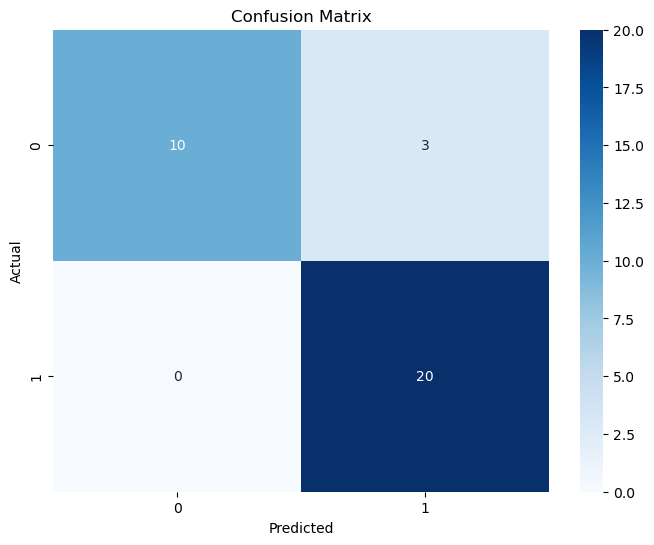

In [53]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import pickle
filename = 'MLMentalHealth-v2.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)